In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Building synthetic chronological series of numbers dataset

data = np.arange(0,200)
data = np.array(data, dtype=float)

In [3]:
# Scaling down the raw data with MinMaxScaler()

scaler = MinMaxScaler(feature_range=(0.01, 1))
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [4]:
data_scaled = data_scaled.flatten()

In [5]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-10]

In [6]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-15:]

In [7]:
# Preparing the training dataset for LSTM input 

T = 5
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (185, 5, 1) Y.Shape: (185,)


In [8]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 5
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (10, 5, 1) Y_test.Shape: (10,)


In [9]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (148, 5, 1) x_test.shape: (37, 5, 1) y_train.shape: (148,) y_test.shape: (37,)


In [37]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((20), batch_input_shape=(None,5,1), return_sequences=True))
model.add(keras.layers.LSTM((1), activation='relu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 20)             1760      
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 88        
Total params: 1,848
Trainable params: 1,848
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(148,5,1), y_train, epochs=1000, validation_data=(x_test.reshape(37,5,1), y_test))

Train on 148 samples, validate on 37 samples
Epoch 1/1000
148/148 [==============================] - 2s 11ms/sample - loss: 0.3940 - acc: 0.0000e+00 - val_loss: 0.8291 - val_acc: 0.0000e+00
Epoch 2/1000
148/148 [==============================] - 0s 256us/sample - loss: 0.3726 - acc: 0.0000e+00 - val_loss: 0.7912 - val_acc: 0.0000e+00
Epoch 3/1000
148/148 [==============================] - 0s 303us/sample - loss: 0.3474 - acc: 0.0000e+00 - val_loss: 0.7485 - val_acc: 0.0000e+00
Epoch 4/1000
148/148 [==============================] - 0s 251us/sample - loss: 0.3203 - acc: 0.0000e+00 - val_loss: 0.6998 - val_acc: 0.0000e+00
Epoch 5/1000
148/148 [==============================] - 0s 263us/sample - loss: 0.2904 - acc: 0.0000e+00 - val_loss: 0.6429 - val_acc: 0.0000e+00


Epoch 995/1000
148/148 [==============================] - 0s 243us/sample - loss: 7.6213e-04 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 996/1000
148/148 [==============================] - 0s 236us/sample - loss: 0.0020 - acc: 0.0000e+00 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 997/1000
148/148 [==============================] - 0s 256us/sample - loss: 7.2267e-04 - acc: 0.0000e+00 - val_loss: 0.0030 - val_acc: 0.0000e+00
Epoch 998/1000
148/148 [==============================] - 0s 243us/sample - loss: 6.1944e-04 - acc: 0.0000e+00 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 999/1000
148/148 [==============================] - 0s 236us/sample - loss: 9.9152e-04 - acc: 0.0000e+00 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 1000/1000
148/148 [==============================] - 0s 249us/sample - loss: 0.0017 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00


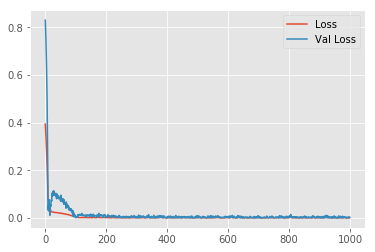

In [40]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()

In [41]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(37,5,1))

In [42]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([153.80191, 154.7991 , 155.79587, 156.79222, 157.78816, 158.78365,
       159.77869, 160.77327, 161.7674 , 162.761  , 163.7542 , 164.74687,
       165.73907, 166.73074, 167.72186, 168.7125 , 169.70262, 170.69215,
       171.68114, 172.66957, 173.65744, 174.64471, 175.63144, 176.61752,
       177.60301, 178.58789, 179.57217, 180.55576, 181.53874, 182.5211 ,
       183.50278, 184.48375, 185.46411, 186.44374, 187.42268, 188.40094,
       189.37848], dtype=float32)

In [43]:
# adjusting predicited y_test values by rounding

np.round(scaler.inverse_transform(result).flatten())

array([154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 184., 185.,
       186., 187., 188., 189.], dtype=float32)

In [44]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([153., 154., 155., 156., 157., 158., 159., 160., 161., 162., 163.,
       164., 165., 166., 167., 168., 169., 170., 171., 172., 173., 174.,
       175., 176., 177., 178., 179., 180., 181., 182., 183., 184., 185.,
       186., 187., 188., 189.])

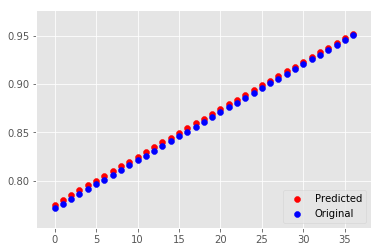

In [45]:
plt.style.use('ggplot')
plt.scatter(range(37), result, c='r', label="Predicted")
plt.scatter(range(37),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

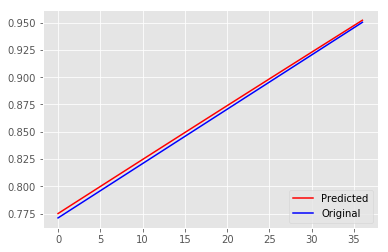

In [46]:
plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [47]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [48]:
result_01

array([0.9569937 , 0.9618495 , 0.9667018 , 0.9715503 , 0.976395  ,
       0.9812359 , 0.98607314, 0.99090636, 0.9957356 , 1.000561  ],
      dtype=float32)

In [49]:
# adjusting predicited Y_test values by rounding  

np.round(scaler.inverse_transform(result_01.reshape(-1,1)).flatten())

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.],
      dtype=float32)

In [50]:
# look into original y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([190., 191., 192., 193., 194., 195., 196., 197., 198., 199.])

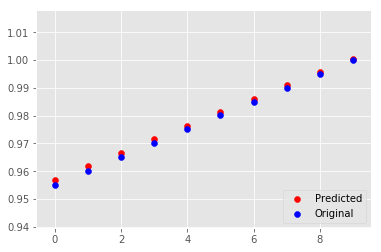

In [51]:
plt.style.use('ggplot')
plt.scatter(range(10), result_01, c='r', label="Predicted")
plt.scatter(range(10),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

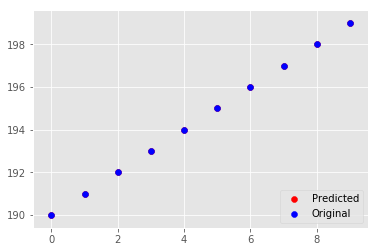

In [52]:
plt.style.use('ggplot')
plt.scatter(range(10), (np.round(scaler.inverse_transform(result_01.reshape(-1,1)))), c='r', label="Predicted")
plt.scatter(range(10),(scaler.inverse_transform(Y_test.reshape(-1,1))), c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()